# Gradient Descent Step-by-Step

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X,y = make_regression(n_samples=4, 
                      n_features=1, 
                      n_informative=1, 
                      n_targets=1,
                      noise=80,
                      random_state=13)

In [28]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [29]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [69]:
df = pd.DataFrame({'X':X[:,0], 'y':y})
df

,X,y
0,-0.712391,7.217866
1,0.451812,16.046099
2,-0.044503,-27.837562
3,0.753766,144.366882


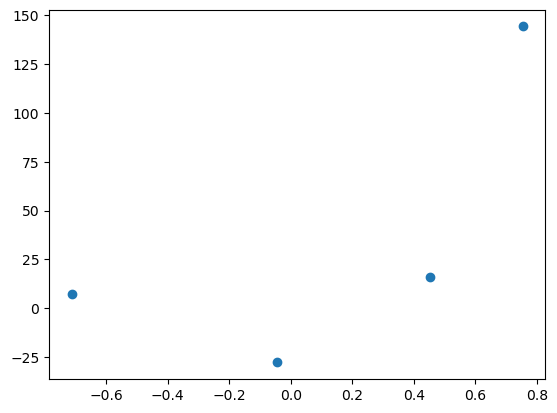

In [3]:
plt.scatter(X,y)
plt.show()

## Let's apply OLS (Ordinary Least Squares)

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [5]:
reg.coef_

array([78.35063668])

In [6]:
reg.intercept_

26.15963284313262

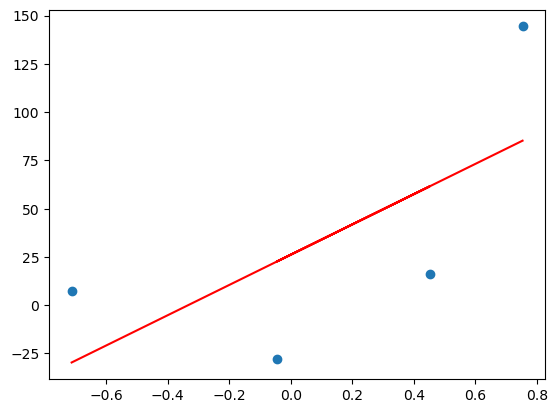

In [7]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), 'r-')
plt.show()

## Let's apply Gradient Descent

In [8]:
# Applying GD assuming slope is constant (m = 78.35)
# and let's assume the starting intercept b = 0

### Iteration 1

In [9]:
# y = mX+b
# m = 78.35; b = 0
y_pred = ((78.35 * X) + 0).ravel()

In [10]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

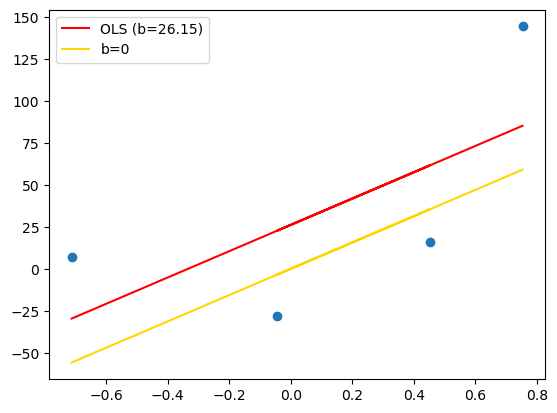

In [11]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS (b=26.15)')
plt.plot(X, y_pred, color='Gold', label='b=0')
plt.legend()
plt.show()

In [12]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [13]:
## Let's take learning rate = 0.1
lr = 0.1

step_size = loss_slope * lr
step_size

-20.927763408209216

In [14]:
# Calculate the new intercept 
b1 = round((b-step_size), 2)
b1

20.93

In [15]:
y_pred1 = ((78.35 * X)+b1).reshape(4)
y_pred1

array([-34.88580837,  56.32949674,  17.44318381,  79.98759577])

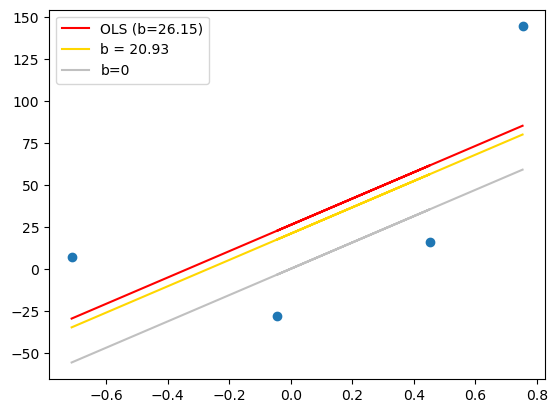

In [16]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS (b=26.15)')
plt.plot(X, y_pred1, color='Gold', label=f'b = {b1}')
plt.plot(X, y_pred, color='Silver', label='b=0')
plt.legend()
plt.show()

### Iteration 2

In [17]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b1)
loss_slope

-41.83763408209215

In [18]:
step_size = loss_slope*lr
step_size

-4.183763408209216

In [19]:
b2 = round((b1-step_size), 2)
b2

25.11

In [20]:
y_pred2 = ((78.35 * X) + b2).reshape(4)
y_pred2

array([-30.70580837,  60.50949674,  21.62318381,  84.16759577])

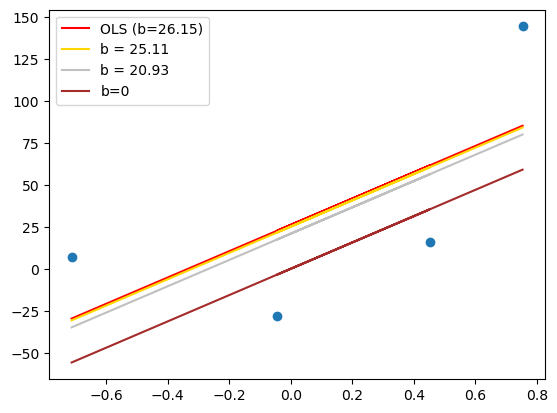

In [21]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS (b=26.15)')
plt.plot(X, y_pred2, color='Gold', label=f'b = {b2}')
plt.plot(X, y_pred1, color='Silver', label=f'b = {b1}')
plt.plot(X, y_pred, color='brown', label='b=0')
plt.legend()
plt.show()

### Iteration 3

In [22]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b2)
loss_slope

-8.397634082092168

In [23]:
step_size = loss_slope*lr
step_size

-0.8397634082092168

In [24]:
b3 = round((b2-step_size), 2)
b3 

25.95

In [25]:
y_pred3 = ((78.35 * X) + b3).reshape(4)
y_pred3

array([-29.86580837,  61.34949674,  22.46318381,  85.00759577])

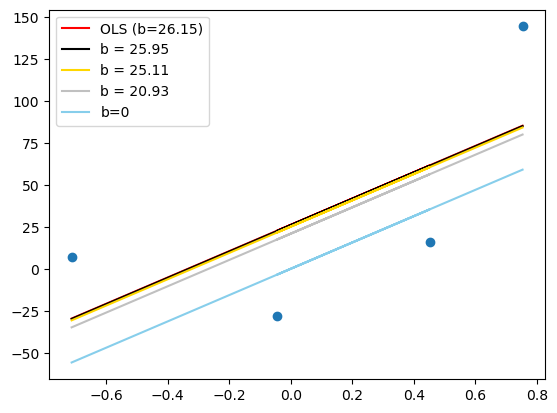

In [27]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS (b=26.15)')
plt.plot(X, y_pred3, color='Black', label=f'b = {b3}')
plt.plot(X, y_pred2, color='Gold', label=f'b = {b2}')
plt.plot(X, y_pred1, color='Silver', label=f'b = {b1}')
plt.plot(X, y_pred, color='skyblue', label='b=0')
plt.legend()
plt.show()

## Creating a Loop

iteration:0, b:220.9278
iteration:1, b:65.1133
iteration:2, b:33.9504
iteration:3, b:27.7178
iteration:4, b:26.4713
iteration:5, b:26.222
iteration:6, b:26.1722
iteration:7, b:26.1622
iteration:8, b:26.1602
iteration:9, b:26.1598


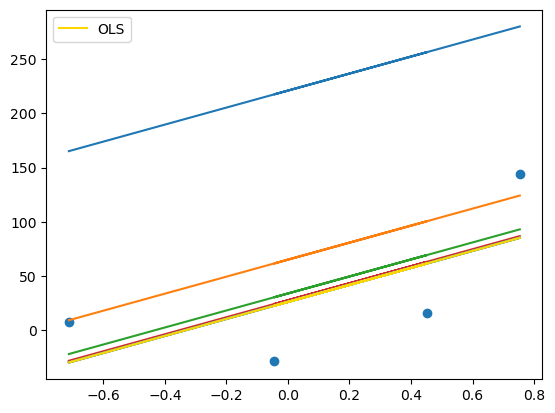

In [55]:
b = 1000
m = 78.35
lr = 0.1

epochs = 10
for i in range(epochs):
    loss_slope = -2 * np.sum(y -m*X.ravel() - b)
    b = b - (lr * loss_slope)
    print(f'iteration:{i}, b:{round(b,4)}')
    y_pred = (m*X) + b
    plt.plot(X,y_pred)
plt.plot(X, reg.predict(X), color='Gold', label='OLS')
plt.scatter(X, y)
plt.legend()
plt.show()